In [13]:
import tensorflow 
import tensorflow as tf
from tensorflow.keras.applications import Xception,DenseNet121,VGG16,InceptionResNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout,Input,Flatten,Dense,MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD , Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import numpy as np 
import pandas as pd 
import os
#import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [14]:
!pip install gradio
import gradio as gr

In [4]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [5]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

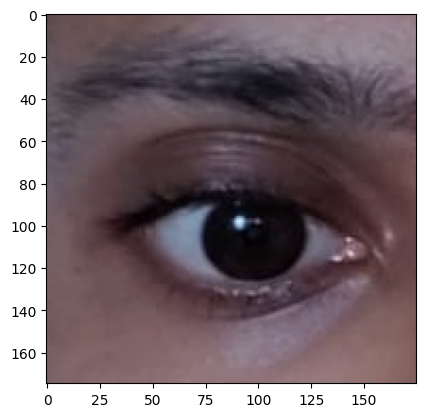

In [6]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Open/_0.jpg"))

In [7]:
a = plt.imread("../input/drowsiness-dataset/train/Closed/_0.jpg")

In [8]:
a.shape

(145, 145, 3)

In [9]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [10]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [11]:
test_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [13]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [14]:
model.build(input_shape=(80, 80, 3))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

In [18]:
hist = model.fit(train_data, epochs=35,validation_data = test_data, shuffle=True)

Epoch 1/35
291/291 [==============================] - 35s 92ms/step - loss: 0.7344 - accuracy: 0.6631 - val_loss: 0.4234 - val_accuracy: 0.7900
Epoch 2/35
291/291 [==============================] - 14s 49ms/step - loss: 0.4111 - accuracy: 0.8009 - val_loss: 0.4415 - val_accuracy: 0.8121
Epoch 3/35
291/291 [==============================] - 15s 51ms/step - loss: 0.3622 - accuracy: 0.8229 - val_loss: 0.3294 - val_accuracy: 0.8379
Epoch 4/35
291/291 [==============================] - 14s 50ms/step - loss: 0.3226 - accuracy: 0.8453 - val_loss: 0.2986 - val_accuracy: 0.8555
Epoch 5/35
291/291 [==============================] - 15s 51ms/step - loss: 0.2780 - accuracy: 0.8733 - val_loss: 0.5530 - val_accuracy: 0.7583
Epoch 6/35
291/291 [==============================] - 14s 49ms/step - loss: 0.2743 - accuracy: 0.8725 - val_loss: 0.2821 - val_accuracy: 0.8721
Epoch 7/35
291/291 [==============================] - 15s 51ms/step - loss: 0.2225 - accuracy: 0.9048 - val_loss: 0.2803 - val_accuracy:

In [19]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

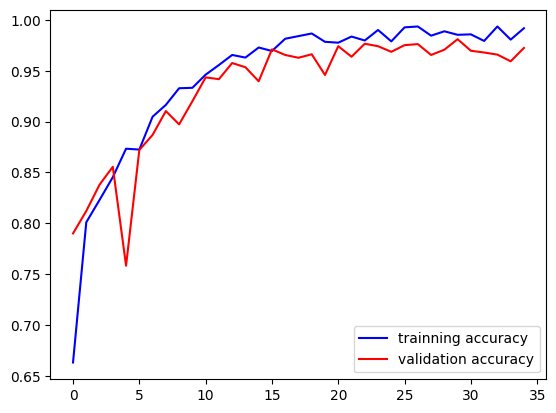

In [20]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

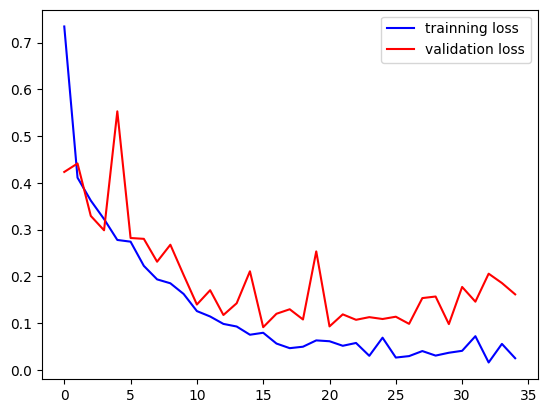

In [21]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [22]:
model.save("drowiness.h5")

In [23]:
model.save("drowiness.model")

In [15]:
model = load_model('drowiness.h5')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 256)       7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 64)         0

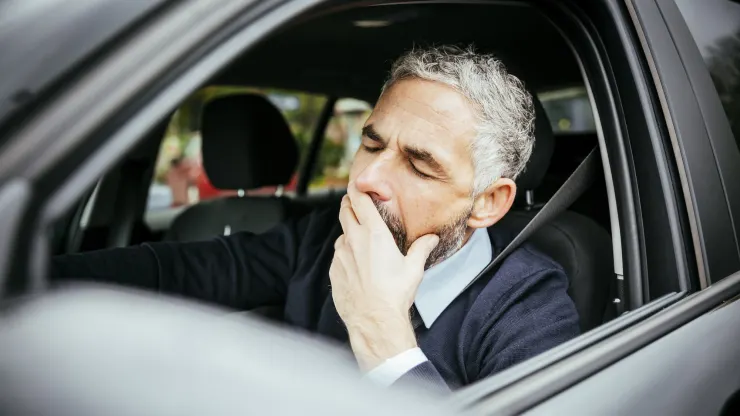

In [26]:
Image.open("/kaggle/input/drowsiness-image-sample/121.jpg")

In [27]:
image_size = (80, 80)

In [28]:
img = Image.open("/kaggle/input/drowsiness-image-sample/121.jpg").resize(image_size)

In [29]:
img = np.array(img)/255.0

In [30]:
img.shape

(80, 80, 3)

In [31]:
result = model.predict(img[np.newaxis, ...])

1/1 [==============================] - 0s 126ms/step


In [32]:
result.shape

(1, 4)

In [33]:
result

array([[6.0863649e-12, 5.1590217e-08, 8.7590408e-05, 9.9991238e-01]],
      dtype=float32)

In [34]:
predicted_label_index = np.argmax(result)

In [35]:
if (predicted_label_index==0):
    print('Closed eyes')
    
elif predicted_label_index==1:
    print('No Yawn Detected')
    
elif predicted_label_index==2:
    print('Open eyes')
    
elif predicted_label_index==3:
    print('Yawn Detected')

Yawn Detected


In [36]:
if (predicted_label_index==0) & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==3):
    print('Drowsiness Detected')

elif predicted_label_index==2 & (predicted_label_index==3):
    print('Drowsiness Detected')

elif (predicted_label_index==1) & (predicted_label_index==2):
    print('No Drowsiness Detected')
    
elif predicted_label_index==1:
    print('No Drowsiness Detected')
    

Drowsiness Detected


In [16]:
new_labels = ['Drowsiness Detected' ,'No Drowsiness Detected' ]

In [17]:
labels =['Closed', 'Open', 'yawn', 'no_yawn']

In [ ]:
def predict_input_image(img):
    img = np.array(img)/2.0
    result = model.predict(img[np.newaxis, ...])
    predicted_label_index = np.argmax(result)
    if (predicted_label_index==0):
        return labels[0],new_labels[0]
    
    elif predicted_label_index==1:
         return labels[3],new_labels[1]
    
    elif predicted_label_index==2:
         return labels[1],new_labels[1]
    
    elif predicted_label_index==3:
         return labels[2],new_labels[0]
    return predicted_label_index



image = gr.inputs.Image(shape=(80,80))
gr.Interface(fn=predict_input_image, inputs=image, outputs = "text").launch(debug='True')

C:\Users\Karim Omran\anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Karim Omran\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 21ms/step


In [ ]:

import pickle
with open('model/best_model.pickle', 'wb') as handle:
    pickle.dump(tfidf_vec_fit,handle)
filename = 'CNN.sav'
pickle.dump(Drowsiness Detection, open(filename, 'wb'))

In [56]:
shape = (224, 224, 3) 
OPTIMIZER = Adam(learning_rate = 0.001 , beta_1 = 0.9 , beta_2 = 0.999)
base_model= tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=shape,
    classifier_activation="softmax",
)
base_model.trainable = True
x= base_model.output
x = GlobalAveragePooling2D()(x)
perdictions = Dense(4 , activation = 'sigmoid', name= 'Final' )(x)
model1 = Model(inputs = base_model.input , outputs = perdictions)
model1.compile(loss = 'binary_crossentropy',optimizer = OPTIMIZER , metrics = ['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [57]:
Histoey = model1.fit(train_data, epochs = 20 , validation_data = test_data)

Epoch 1/20
291/291 [==============================] - 21s 58ms/step - loss: 0.5982 - accuracy: 0.2426 - val_loss: 0.5505 - val_accuracy: 0.2493
Epoch 2/20
291/291 [==============================] - 16s 54ms/step - loss: 0.4198 - accuracy: 0.4877 - val_loss: 0.4094 - val_accuracy: 0.6676
Epoch 3/20
291/291 [==============================] - 16s 56ms/step - loss: 0.2790 - accuracy: 0.6846 - val_loss: 0.2332 - val_accuracy: 0.7114
Epoch 4/20
291/291 [==============================] - 16s 54ms/step - loss: 0.2307 - accuracy: 0.7518 - val_loss: 0.1920 - val_accuracy: 0.7738
Epoch 5/20
291/291 [==============================] - 16s 55ms/step - loss: 0.2262 - accuracy: 0.7889 - val_loss: 0.5116 - val_accuracy: 0.5959
Epoch 6/20
291/291 [==============================] - 16s 54ms/step - loss: 0.2300 - accuracy: 0.7734 - val_loss: 0.1788 - val_accuracy: 0.8169
Epoch 7/20
291/291 [==============================] - 16s 55ms/step - loss: 0.1754 - accuracy: 0.8005 - val_loss: 0.1639 - val_accuracy:

In [58]:
accuracy = Histoey.history['accuracy']
val_accuracy = Histoey.history['val_accuracy']
loss = Histoey.history['loss']
val_loss = Histoey.history['val_loss']
epochs = range(len(accuracy))

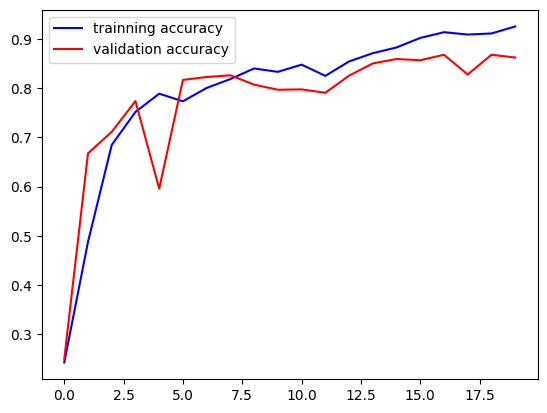

In [59]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

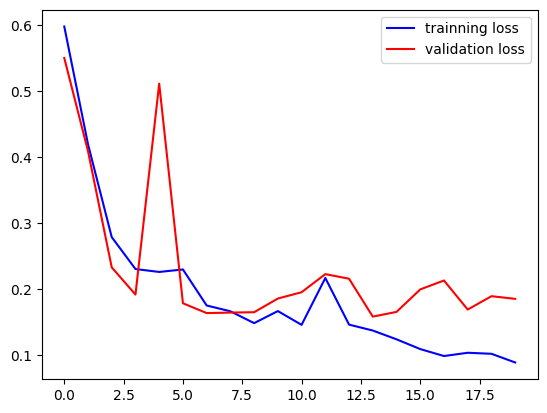

In [60]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [61]:
shape = (224, 224, 3) 
OPTIMIZER = Adam(learning_rate = 0.001 , beta_1 = 0.9 , beta_2 = 0.999)
base_model= tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=shape,
    classifier_activation="softmax",
)
base_model.trainable = True
x= base_model.output
x = GlobalAveragePooling2D()(x)
perdictions = Dense(4 , activation = 'sigmoid', name= 'Final' )(x)
model2 = Model(inputs = base_model.input , outputs = perdictions)
model2.compile(loss = 'binary_crossentropy',optimizer = OPTIMIZER , metrics = ['accuracy'])

16705208/16705208 [==============================] - 1s 0us/step


In [62]:
Histoey = model2.fit(train_data, epochs = 20 , validation_data = test_data)

Epoch 1/20


2023-05-17 09:45:12.196346: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel_3/block2b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


291/291 [==============================] - 65s 90ms/step - loss: 0.2257 - accuracy: 0.8285 - val_loss: 2.5543 - val_accuracy: 0.2503
Epoch 2/20
291/291 [==============================] - 23s 79ms/step - loss: 0.1094 - accuracy: 0.9246 - val_loss: 1.4430 - val_accuracy: 0.2686
Epoch 3/20
291/291 [==============================] - 25s 86ms/step - loss: 0.0417 - accuracy: 0.9741 - val_loss: 1.1675 - val_accuracy: 0.2507
Epoch 4/20
291/291 [==============================] - 25s 86ms/step - loss: 0.0385 - accuracy: 0.9815 - val_loss: 0.6635 - val_accuracy: 0.3083
Epoch 5/20
291/291 [==============================] - 23s 80ms/step - loss: 0.0270 - accuracy: 0.9888 - val_loss: 12.6540 - val_accuracy: 0.3028
Epoch 6/20
291/291 [==============================] - 23s 79ms/step - loss: 0.0173 - accuracy: 0.9905 - val_loss: 1.3883 - val_accuracy: 0.2569
Epoch 7/20
291/291 [==============================] - 25s 86ms/step - loss: 0.0184 - accuracy: 0.9888 - val_loss: 0.5854 - val_accuracy: 0.4690
Ep

In [63]:
accuracy = Histoey.history['accuracy']
val_accuracy = Histoey.history['val_accuracy']
loss = Histoey.history['loss']
val_loss = Histoey.history['val_loss']
epochs = range(len(accuracy))

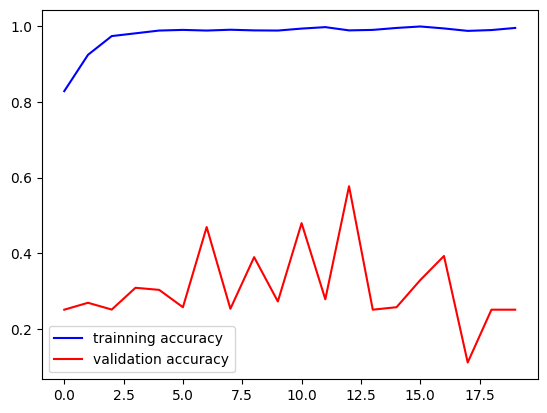

In [64]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

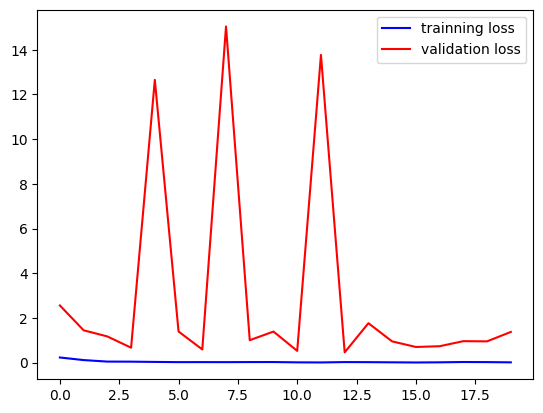

In [65]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [14]:
shape = (224, 224, 3) 
OPTIMIZER = Adam(learning_rate = 0.001 , beta_1 = 0.9 , beta_2 = 0.999)
base_model= tf.keras.applications.InceptionResNetV2(
    include_top=False,
    weights="imagenet",
    input_shape=shape,
    classifier_activation="softmax",
)
base_model.trainable = True
x= base_model.output
x = GlobalAveragePooling2D()(x)
perdictions = Dense(4 , activation = 'sigmoid', name= 'Final' )(x)
model3 = Model(inputs = base_model.input , outputs = perdictions)
model3.compile(loss = 'binary_crossentropy',optimizer = OPTIMIZER , metrics = ['accuracy'])

219055592/219055592 [==============================] - 1s 0us/step


In [16]:
Histoey = model3.fit(train_data, epochs = 20 , validation_data = test_data)

Epoch 1/20
291/291 [==============================] - 147s 195ms/step - loss: 0.2275 - accuracy: 0.8277 - val_loss: nan - val_accuracy: 0.2503
Epoch 2/20
291/291 [==============================] - 48s 166ms/step - loss: 0.1116 - accuracy: 0.9332 - val_loss: nan - val_accuracy: 0.2503
Epoch 3/20
291/291 [==============================] - 49s 167ms/step - loss: 0.0690 - accuracy: 0.9634 - val_loss: nan - val_accuracy: 0.2503
Epoch 4/20
291/291 [==============================] - 48s 165ms/step - loss: 0.0613 - accuracy: 0.9690 - val_loss: nan - val_accuracy: 0.2503
Epoch 5/20
291/291 [==============================] - 49s 169ms/step - loss: 0.0576 - accuracy: 0.9707 - val_loss: nan - val_accuracy: 0.2503
Epoch 6/20
291/291 [==============================] - 49s 168ms/step - loss: 0.0105 - accuracy: 0.9940 - val_loss: nan - val_accuracy: 0.2503
Epoch 7/20
291/291 [==============================] - 50s 172ms/step - loss: 0.0253 - accuracy: 0.9888 - val_loss: nan - val_accuracy: 0.2503
Epoch

In [17]:
accuracy = Histoey.history['accuracy']
val_accuracy = Histoey.history['val_accuracy']
loss = Histoey.history['loss']
val_loss = Histoey.history['val_loss']
epochs = range(len(accuracy))

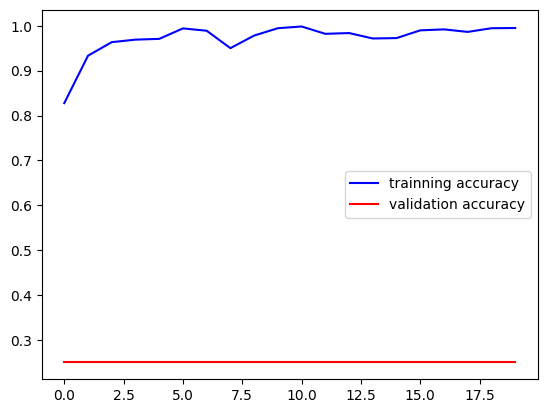

In [18]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

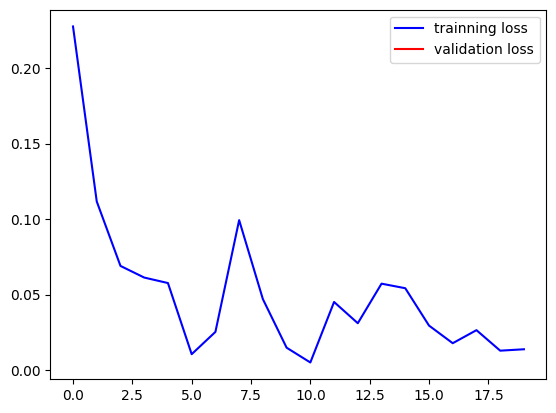

In [19]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [20]:
shape = (224, 224, 3) 
OPTIMIZER = Adam(learning_rate = 0.001 , beta_1 = 0.9 , beta_2 = 0.999)
base_model= tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=shape,
    classifier_activation="softmax",
)
base_model.trainable = True
x= base_model.output
x = GlobalAveragePooling2D()(x)
perdictions = Dense(4 , activation = 'sigmoid', name= 'Final' )(x)
model4 = Model(inputs = base_model.input , outputs = perdictions)
model4.compile(loss = 'binary_crossentropy',optimizer = OPTIMIZER , metrics = ['accuracy'])

29084464/29084464 [==============================] - 0s 0us/step


In [21]:
Histoey = model4.fit(train_data, epochs = 20 , validation_data = test_data)

Epoch 1/20
291/291 [==============================] - 93s 119ms/step - loss: 0.1689 - accuracy: 0.8897 - val_loss: 0.0730 - val_accuracy: 0.9541
Epoch 2/20
291/291 [==============================] - 32s 110ms/step - loss: 0.1153 - accuracy: 0.9345 - val_loss: 0.0699 - val_accuracy: 0.9524
Epoch 3/20
291/291 [==============================] - 33s 114ms/step - loss: 0.0694 - accuracy: 0.9569 - val_loss: 0.0765 - val_accuracy: 0.9521
Epoch 4/20
291/291 [==============================] - 33s 114ms/step - loss: 0.0412 - accuracy: 0.9772 - val_loss: 0.0185 - val_accuracy: 0.9893
Epoch 5/20
291/291 [==============================] - 32s 110ms/step - loss: 0.0301 - accuracy: 0.9849 - val_loss: 0.0196 - val_accuracy: 0.9872
Epoch 6/20
291/291 [==============================] - 32s 109ms/step - loss: 0.0421 - accuracy: 0.9798 - val_loss: 0.1437 - val_accuracy: 0.9079
Epoch 7/20
291/291 [==============================] - 32s 109ms/step - loss: 0.0288 - accuracy: 0.9875 - val_loss: 0.0186 - val_ac

In [22]:
accuracy = Histoey.history['accuracy']
val_accuracy = Histoey.history['val_accuracy']
loss = Histoey.history['loss']
val_loss = Histoey.history['val_loss']
epochs = range(len(accuracy))

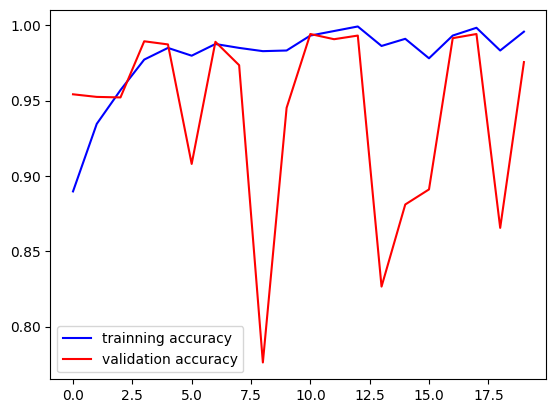

In [23]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

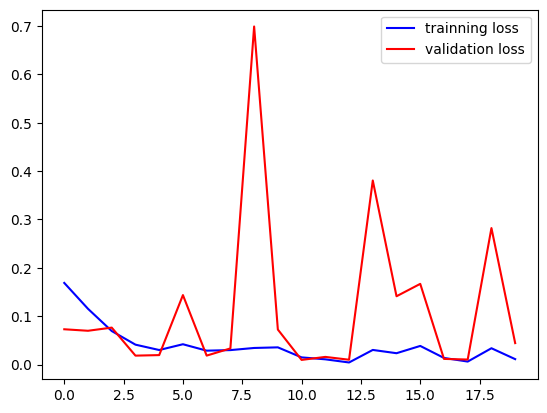

In [24]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()